# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Weather_Features.csv for time series forecasting

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [31]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [32]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Weather_Features.csv', parse_dates=['date_time'], index_col='date_time')

# Data Overview

**Data Dictionary**

* **date_time**: date and time index localized to CET
* **city_name**: name of city
* **temp**: temperature in Fahrenheit
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of temp recording
* **month**: month of temp recording
* **year**: year of temp recording

**Data Preview**

In [33]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (178375, 7)


,city_name,temp,date,time,weekday,month,year
date_time,,,,,,,
2015-01-01 00:00:00,Valencia,27.1850,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,Valencia,27.1850,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,Valencia,25.7648,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,Valencia,25.7648,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,Valencia,25.7648,2015-01-01,04:00:00,Thursday,January,2015


**About the data**

In [34]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
                temp           year
count  178375.000000  178375.000000
mean       61.643440    2016.508670
std        14.447722       1.117775
min        12.362000    2015.000000
25%        50.936000    2016.000000
50%        60.800000    2017.000000
75%        71.600000    2018.000000
max       108.410000    2018.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178375 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   city_name  178375 non-null  object 
 1   temp       178375 non-null  float64
 2   date       178375 non-null  object 
 3   time       178375 non-null  object 
 4   weekday    178375 non-null  object 
 5   month      178375 non-null  object 
 6   year       178375 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 10.9+ MB
None


# Preprocessing for Time Series

## Feature Engineering

### Data preparation

**Create data frames pertaining to Bilbao and Seville(coolest and warmest cities in Spain in original data set)**

In [35]:
#Keep city_name and temp cols for Time Series Analysis
df = df[['city_name','temp']]

#Subset coolest city Bilbao
bilbao = df.loc[df.city_name == 'Bilbao']

#Subset warmest city Seville
seville = df.loc[df.city_name == 'Seville']

#Drop city_name(redundant)
bilbao.drop('city_name', axis = 1, inplace = True)
seville.drop('city_name', axis = 1, inplace = True)

#Check
print('Bilbao Data:\n',bilbao.head())
print('\nSeville Data:\n',seville.head())

Bilbao Data:
                           temp
date_time                     
2015-01-01 00:00:00  25.713163
2015-01-01 01:00:00  25.904300
2015-01-01 02:00:00  24.983038
2015-01-01 03:00:00  24.896019
2015-01-01 04:00:00  25.403900

Seville Data:
                         temp
date_time                   
2015-01-01 00:00:00  32.4050
2015-01-01 01:00:00  32.4050
2015-01-01 02:00:00  33.6848
2015-01-01 03:00:00  33.6848
2015-01-01 04:00:00  33.6848


**View target distributions of Bilbao and Seville**

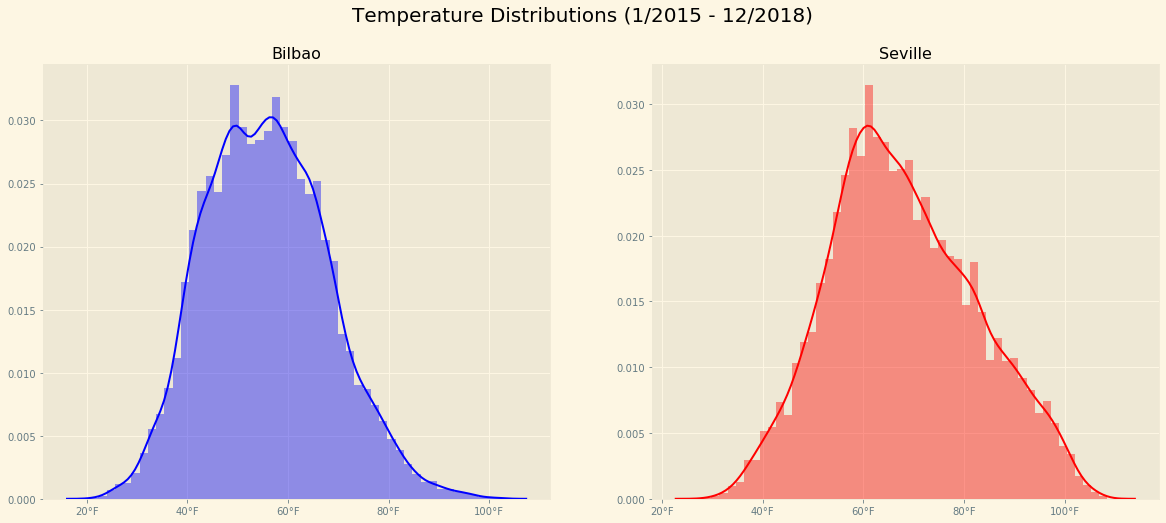

In [36]:
#Set figure
f, ax = plt.subplots(1,2,figsize = (20,8))

#Plot targets
sns.distplot(bilbao.temp, ax = ax[0], color = 'blue', )
sns.distplot(seville.temp, ax = ax[1], color = 'red')

###Set plot aesthetics###
#Main Title
f.suptitle('Temperature Distributions (1/2015 - 12/2018)', fontsize = 20)

##plot1
#Title
ax[0].set_title('Bilbao')

#Axes
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[0].set_xlabel('')


##plot 2
#Title
ax[1].set_title('Seville')

#Axes
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].set_xlabel('');

**Timeplots: Bilbao and Seville**

In [37]:
#PNG Files of both cities with smoothing

**Autocorrelation plots**

In [38]:
#Autocorrelation PNG

### Stationarize Data - Bilboa

**Stationarize Bilboa Data**

In [39]:
#Apply differencing to temp to deseason 
bilbao['first_deseasoned_temp'] = bilbao['temp'].diff(24)

#Apply log transformation to temp
bilbao['log_temp'] = bilbao['temp'].apply(lambda x: np.log(x + 1))

#Apply differencing to log_temp to deseason 
bilbao['first_deseasoned_log_temp'] = bilbao['log_temp'].diff(24)

#Check
display(bilbao.head())

,temp,first_deseasoned_temp,log_temp,first_deseasoned_log_temp
date_time,,,,
2015-01-01 00:00:00,25.713163,NaN,3.285156,NaN
2015-01-01 01:00:00,25.904300,NaN,3.292286,NaN
2015-01-01 02:00:00,24.983038,NaN,3.257444,NaN
2015-01-01 03:00:00,24.896019,NaN,3.254089,NaN
2015-01-01 04:00:00,25.403900,NaN,3.273512,NaN


**Visualize deseasoned data**

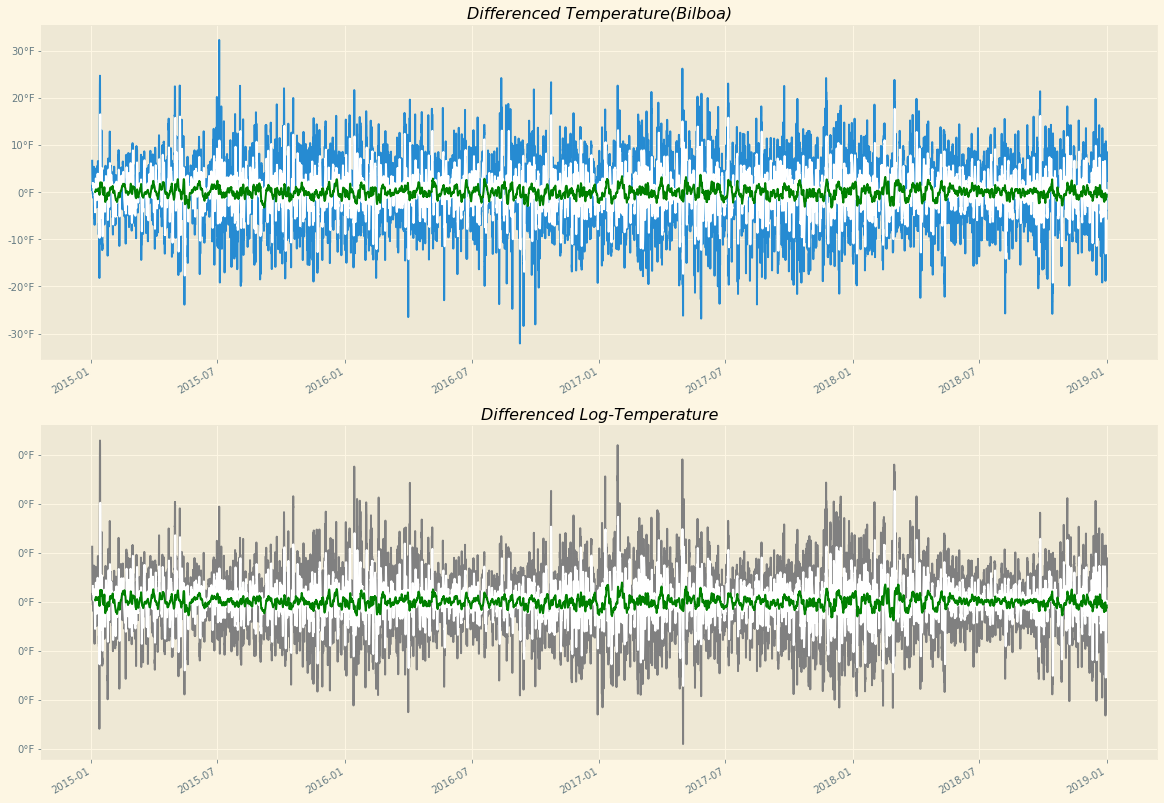

In [60]:
###visualize residuals
f, ax = plt.subplots(2,1,figsize = (20,15))

#Plot deseasoned data 
bilbao.first_deseasoned_temp.plot(ax = ax[0])
bilbao.first_deseasoned_temp.rolling(24,24).mean().plot(color = 'white',ax = ax[0])#24 hrs
bilbao.first_deseasoned_temp.rolling(24*7,24*4).mean().plot(color = 'g',ax = ax[0])#7 days

bilbao.first_deseasoned_log_temp.plot(ax = ax[1], color = 'grey')
bilbao.first_deseasoned_log_temp.rolling(24,24).mean().plot(color = 'white',ax = ax[1])#24 hrs
bilbao.first_deseasoned_log_temp.rolling(24*7,24*4).mean().plot(color = 'g',ax = ax[1])#7 days
###Set plot aesthetics###
#Title
ax[0].set_title('Differenced Temperature(Bilboa)', style = 'italic')
ax[1].set_title('Differenced Log-Temperature',style = 'italic')

#Axes
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

### Test for stationarity

**Functions for tests**

In [41]:
#Import KPSS and ADF
from statsmodels.tsa.stattools import adfuller, kpss

#Function runs ADF and KPSS test on series, prints results
def ADF_KPSS_test(series, periods):
    """
    Series: Time series data you would like to test for stationrity
    Periods: Seasonal period
    """
    #Convert series to values and subset to remove NA values
    X = series.values[periods:]
    
    #Implement ADF and KPSS
    adf_results = adfuller(X)
    kpss_results = kpss(X)
    
    #Print results
    print('ADF Statistic: {}'.format(adf_results[0]))
    print('P-Value: {}'.format(adf_results[1]))
    for k,v in adf_results[4].items():
        print('Critical Values {} : {}'.format(k,round(v,4)))
    print('===============================================')
    print('KPSS Statistic: {}'.format(kpss_results[0]))
    print('P-Value: {}'.format(kpss_results[1]))
    for k,v in kpss_results[3].items():
        print('Critical Values {} : {}'.format(k,round(v,4)))
    
#Function calculates and prints mean and variance metrics of first and second half of time series
def mean_var_test(series, periods):
    """
    Series: Time series data you would like to test for stationrity
    Periods: Seasonal period
    """
    #Convert series to values and subset to remove NA values
    X = series.values[periods:]
    
    #Set split to be midpoint of time series
    split = round(len(X)/2)
    #Split time series
    X1,X2 = X[:split], X[split:]
    #calculate and print mean and var of 2 halves of time series 
    mean1, mean2 = np.mean(X1), np.mean(X2)
    var1, var2 = np.var(X1), np.var(X2)
    return print('Mean1: {}\nMean2: {}\nVar1: {}\nVar2: {}'.format(mean1, mean2, var1, var2))

**Test Bilbao Data**

*Deseasoned temperature data*

In [42]:
#Test deseasoned temp
ADF_KPSS_test(bilbao.first_deseasoned_temp, 24)

ADF Statistic: -29.73513074738507
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.019900201835149428
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [43]:
#View metrics variance and mean stats
mean_var_test(bilbao.first_deseasoned_temp,24)

Mean1: -0.0014583506151876187
Mean2: 0.0051170870218807014
Var1: 35.61937716180104
Var2: 40.686779046119824


*Deseasoned log-temperature data*

In [44]:
#Test deseasoned temp
ADF_KPSS_test(bilbao.first_deseasoned_log_temp, 24)

ADF Statistic: -29.23372706340709
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.02509369617161985
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [45]:
#View metrics variance and mean stats
mean_var_test(bilbao.first_deseasoned_log_temp,24)

Mean1: -2.539769744571666e-05
Mean2: 0.00013426765560083315
Var1: 0.01188505232730019
Var2: 0.014399375599010058


Data is stationary

### Stationarize Data - Seville

**Stationarize Bilboa Data**

In [46]:
#Apply differencing to temp to deseason 
seville['first_deseasoned_temp'] = seville['temp'].diff(24)

#Apply log transformation to temp
seville['log_temp'] = seville['temp'].apply(lambda x: np.log(x + 1))

#Apply differencing to log_temp to deseason 
seville['first_deseasoned_log_temp'] = seville['log_temp'].diff(24)

#Check
display(seville.head())

,temp,first_deseasoned_temp,log_temp,first_deseasoned_log_temp
date_time,,,,
2015-01-01 00:00:00,32.4050,NaN,3.508706,NaN
2015-01-01 01:00:00,32.4050,NaN,3.508706,NaN
2015-01-01 02:00:00,33.6848,NaN,3.546302,NaN
2015-01-01 03:00:00,33.6848,NaN,3.546302,NaN
2015-01-01 04:00:00,33.6848,NaN,3.546302,NaN


**Visualize deseasoned data**

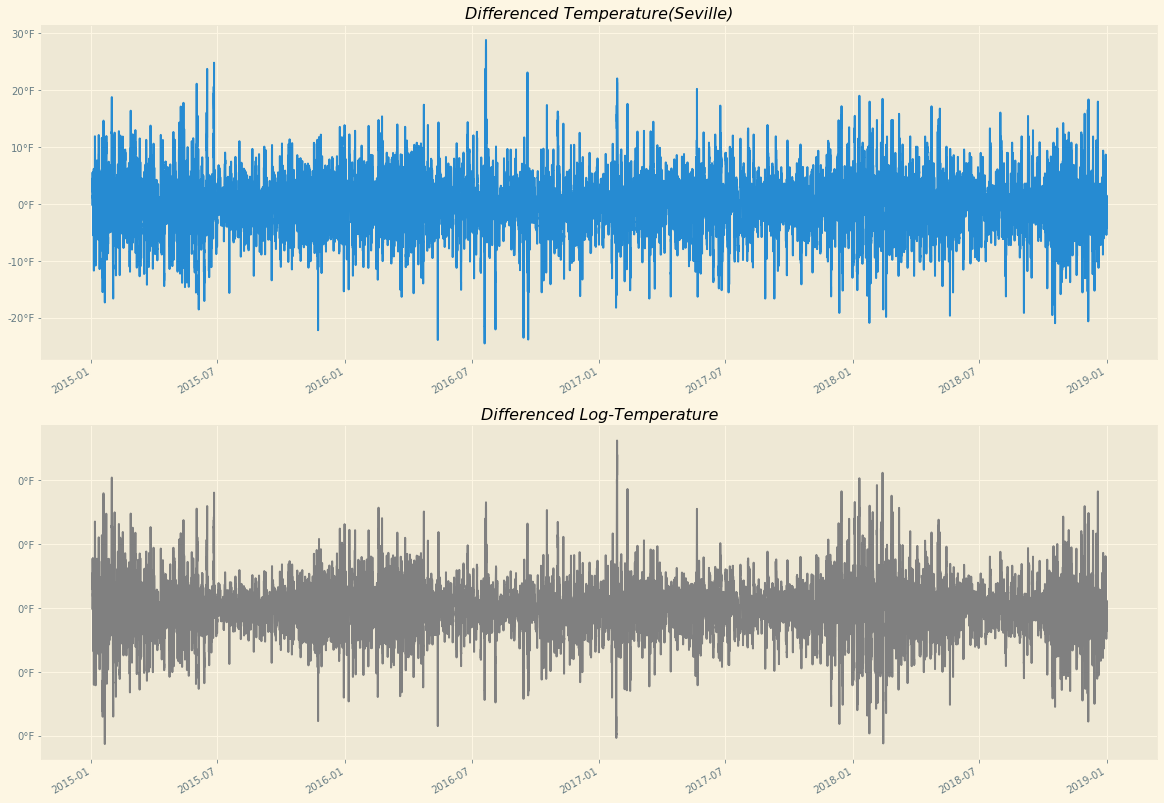

In [47]:
###visualize residuals
f, ax = plt.subplots(2,1,figsize = (20,15))

#Plot deseasoned data 
seville.first_deseasoned_temp.plot(ax = ax[0])
seville.first_deseasoned_log_temp.plot(ax = ax[1], color = 'grey')

###Set plot aesthetics###
#Title
ax[0].set_title('Differenced Temperature(Seville)', style = 'italic')
ax[1].set_title('Differenced Log-Temperature',style = 'italic')

#Axes
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

### Test for stationarity

**Test Seville Data**

*Deseasoned temperature data*

In [48]:
#Test deseasoned temp
ADF_KPSS_test(seville.first_deseasoned_temp, 24)

ADF Statistic: -27.476535186434052
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.04253065938561082
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [49]:
#View metrics variance and mean stats
mean_var_test(seville.first_deseasoned_temp,24)

Mean1: 0.01912589295766718
Mean2: -0.005468392907402184
Var1: 18.91772572343099
Var2: 21.53856192034704


*Deseasoned log-temperature data*

In [50]:
#Test deseasoned temp
ADF_KPSS_test(seville.first_deseasoned_log_temp, 24)

ADF Statistic: -28.07787145372042
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.04964476079130685
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [51]:
#View metrics variance and mean stats
mean_var_test(seville.first_deseasoned_log_temp,24)

Mean1: 0.0003974386294990483
Mean2: -9.978574198963962e-05
Var1: 0.004534360924301407
Var2: 0.00593976104481208


Data is stationary

# Write CSV's

**Split Bilbao and Seville into Training and Test sets**

In [52]:
###Bilbao data###
#Set split point to capture 80% of data for training
split = round(len(bilbao) * .8)

#Assign 80% of data to b_train and 20% to b_test
b_train = bilbao[:split]
b_test = bilbao[split:]

###Seville data###
#Set split point to capture 80% of data for training
split = round(len(seville) * .8)

#Assign 80% of data to s_train and 20% to s_test
s_train = seville[:split]
s_test = seville[split:]

#Subset Targets for test data

In [53]:
#Subset target variables to test data and convert them into arrays
b_test = b_test['temp']
s_test = s_test['temp']

**Write files to CSV**

In [54]:
#Write b_train and b_test to files
b_train.to_csv(path + '/Data/03_Processed_Data/2020_0512_Bilbao_train.csv')
b_test.to_csv(path + '/Data/03_Processed_Data/2020_0512_Bilbao_test.csv')

#Write s_train and s_test to files
s_train.to_csv(path + '/Data/03_Processed_Data/2020_0512_Seville_train.csv')
s_test.to_csv(path + '/Data/03_Processed_Data/2020_0512_Seville_test.csv')